In [1]:
%matplotlib notebook
import numpy as np
from numba import njit
import matplotlib.pyplot as plt
from matplotlib import rc
from cg2d import sweep
from cg2d_energy import calc_V, calc_H, calc_dH_pair_mirror, calc_dH_single_mirror

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

### Figure 1

<IPython.core.display.Javascript object>


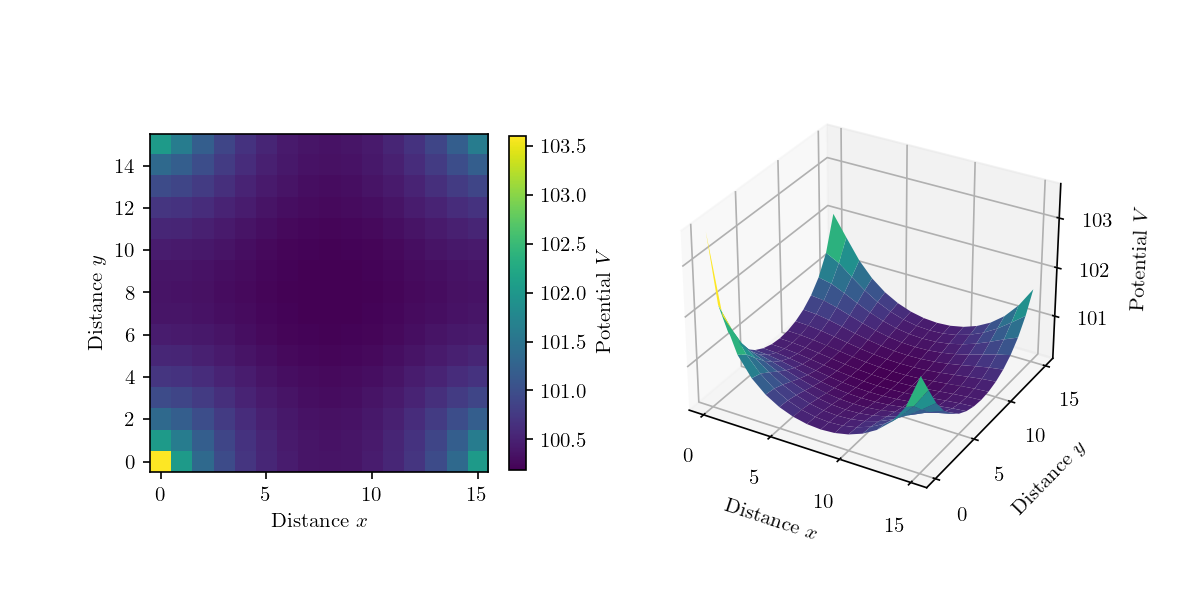

In [2]:
# Figure 1
L = 16
lambd = 4*L
V = calc_V(L,L,lambd)
X,Y = np.meshgrid(np.linspace(0,L-1,L),np.linspace(0,L-1,L))
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
im = ax1.imshow(V,origin='lower')
ax1.set_xlabel(r'Distance $x$')
ax1.set_ylabel(r'Distance $y$')
fig.colorbar(im,label=r'Potential $V$',shrink=0.725)
ax2 = fig.add_subplot(122, projection='3d')
cset = ax2.plot_surface(X,Y,V,cmap='viridis',linewidth=0)
ax2.set_xlabel(r'Distance $x$')
ax2.set_ylabel(r'Distance $y$')
ax2.set_zlabel(r'Potential $V$')
plt.savefig('3dV.pdf',bbox_inches='tight')

### Figure 2

<IPython.core.display.Javascript object>


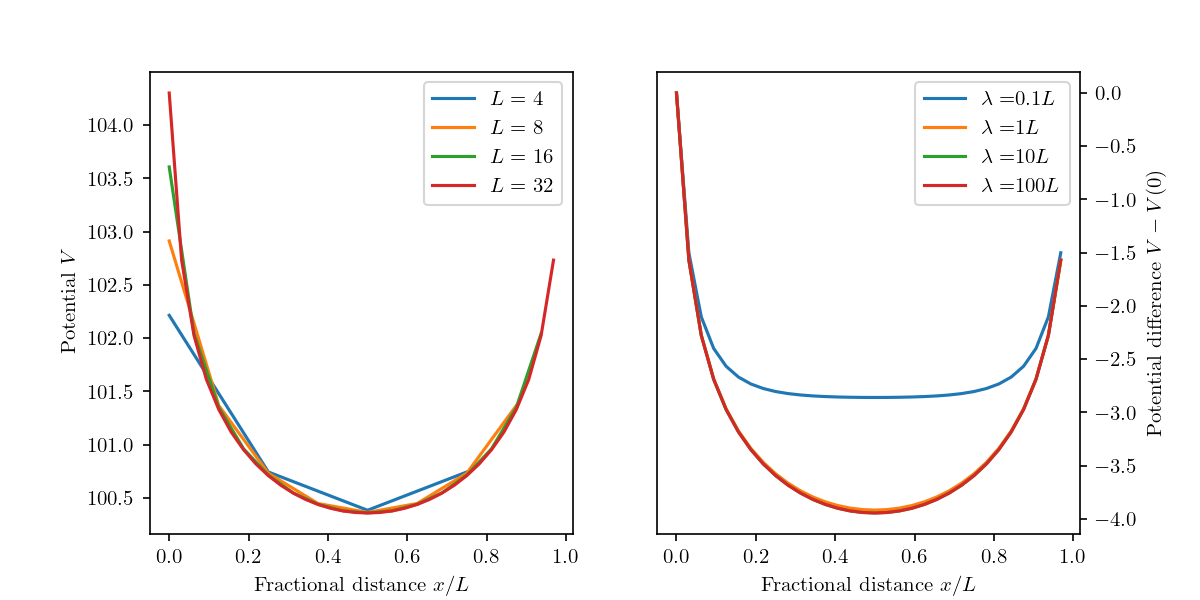

In [3]:
# Figure 2
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

L_list = [4,8,16,32]
for L in L_list:
    lambd = 4*L
    V = calc_V(L,L,lambd)
    ax1.plot(np.linspace(0,L-1,L)/L,V[:,0],label=r'$L = $'+f' {L}')

L = 32
lambd_fact_list = [0.1,1,10,100]
for lambd_fact in lambd_fact_list:
    lambd = lambd_fact*L
    V = calc_V(L,L,lambd)
    ax2.plot(np.linspace(0,L-1,L)/L,V[:,0]-V[0,0],label=r'$\lambda = $'+str(lambd_fact)+r'$L$')
ax1.set_xlabel(r'Fractional distance $x/L$')
ax1.set_ylabel(r'Potential $V$')
ax1.legend()
ax2.set_xlabel(r'Fractional distance $x/L$')
ax2.set_ylabel(r'Potential difference $V - V(0)$')
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
ax2.legend()
plt.savefig('V.pdf',bbox_inches='tight')

### Figure 3

<IPython.core.display.Javascript object>


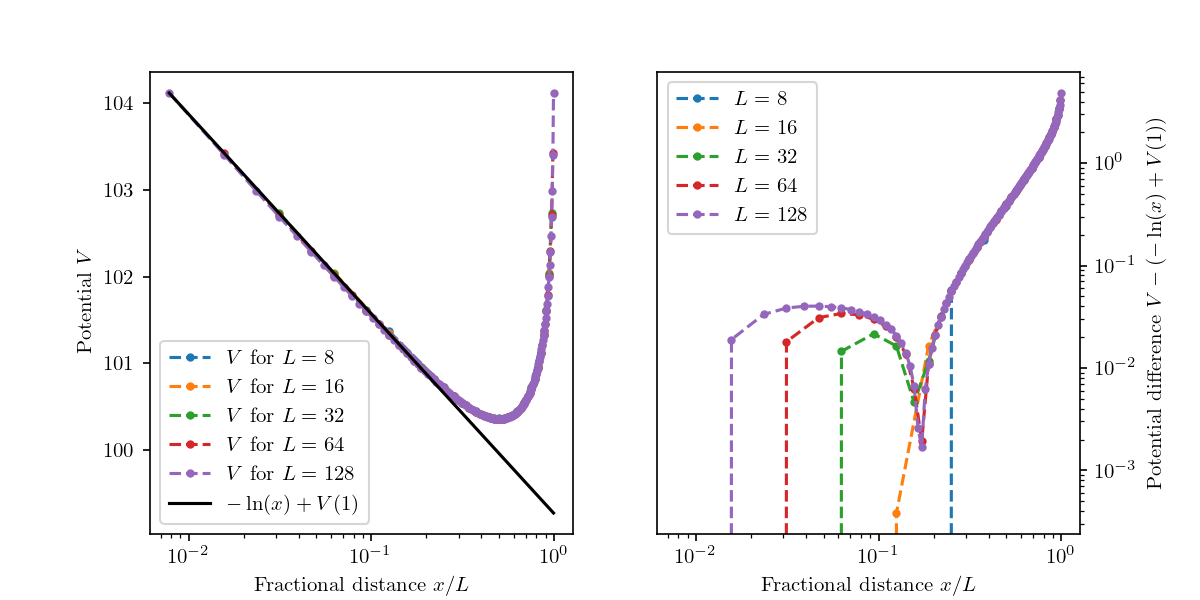

In [4]:
# Figure 3
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
for L in [8,16,32,64,128]:
    lambd = 4*L
    V = calc_V(L,L,lambd)
    ax1.semilogx(np.linspace(1,L-1,L-1)/L,V[1:,0],'.--',label=r'$V$ for $L = $'+f' {L}')
    ax2.loglog(np.linspace(1,L-1,L-1)/L,np.abs(V[1:,0]-(V[1,0]-np.log(np.linspace(1,L-1,L-1)))),'.--',label=r'$L = $'+f' {L}')
ax1.semilogx(np.linspace(1,L-1,L-1)/L,V[1,0]-np.log(np.linspace(1,L-1,L-1)),'k',label=r'$-\ln(x)+V(1)$')
ax1.set_xlabel(r'Fractional distance $x/L$')
ax1.set_ylabel(r'Potential $V$')
ax1.legend()
ax2.set_xlabel(r'Fractional distance $x/L$')
ax2.set_ylabel(r'Potential difference $V - (-\ln(x)+V(1))$')
ax2.legend()
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
plt.savefig('V_logplot.pdf',bbox_inches='tight')

### Figure 4

<IPython.core.display.Javascript object>


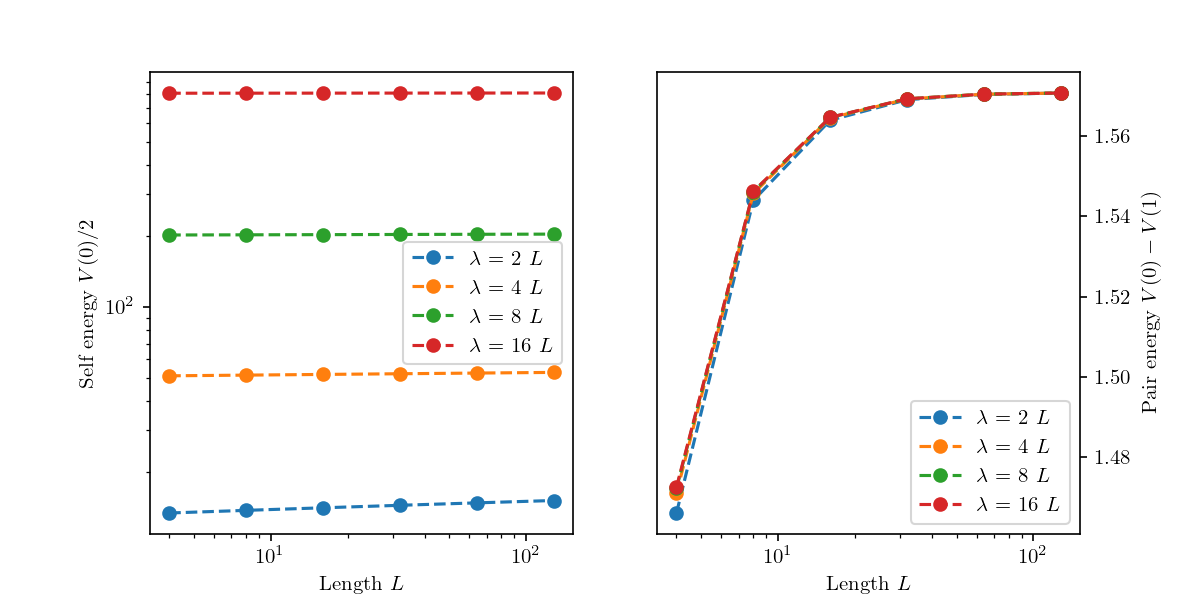

In [5]:
# Figure 4
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

L_list = [4,8,16,32,64,128]
for lambd_fact in [2,4,8,16]:
    pair_energy = []
    self_energy = []
    for L in L_list:
        lambd = lambd_fact*L
        V = calc_V(L,L,lambd)
        self_energy.append(0.5*V[0,0])
        pair_energy.append(V[0,0]-V[1,0])

    ax1.loglog(L_list, self_energy,'o--', label = r'$\lambda$ = '+str(lambd_fact)+' $L$')
    ax2.semilogx(L_list, pair_energy,'o--', label = r'$\lambda$ = '+str(lambd_fact)+' $L$')

ax1.set_xlabel(r'Length $L$')
ax1.set_ylabel(r'Self energy $V(0)/2$')
ax1.legend()
ax2.set_xlabel(r'Length $L$')
ax2.set_ylabel(r'Pair energy $V(0)-V(1)$')
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
ax2.legend()
plt.savefig('V_self_pair.pdf',bbox_inches='tight')

### Figure 5

<IPython.core.display.Javascript object>


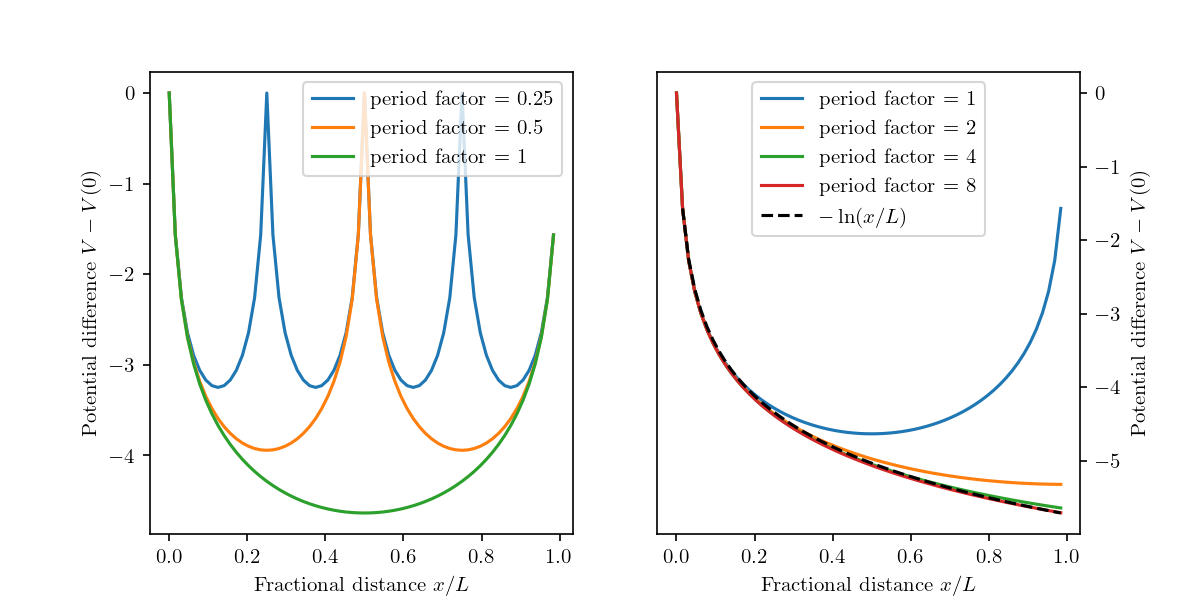

C:\Users\jonat\AppData\Local\Temp/ipykernel_14500/230535652.py:19: RuntimeWarning: divide by zero encountered in log
  ax2.plot(np.linspace(0,L-1,L)/L,V[1,0]-np.log(np.linspace(0,L-1,L))-V[0,0],'--k',label=r'$-\ln(x/L)$')


In [6]:
# Figure 5
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

L = 64
period_factor_list = [1/4,1/2,1]
for period_factor in period_factor_list:
    lambd = 4*L
    V = calc_V(L,L,lambd,period_factor,period_factor)
    ax1.plot(np.linspace(0,L-1,L)/L,V[:,0]-V[0,0],label=f'period factor = {period_factor}')

L = 64
period_factor_list = [1,2,4,8]
for period_factor in period_factor_list:
    lambd = 4*L
    V = calc_V(L,L,lambd,period_factor,period_factor)
    ax2.plot(np.linspace(0,L-1,L)/L,V[:,0]-V[0,0],label=f'period factor = {period_factor}')
ax2.plot(np.linspace(0,L-1,L)/L,V[1,0]-np.log(np.linspace(0,L-1,L))-V[0,0],'--k',label=r'$-\ln(x/L)$')
ax1.set_xlabel(r'Fractional distance $x/L$')
ax1.set_ylabel(r'Potential difference $V - V(0)$')
ax1.legend()
ax2.set_xlabel(r'Fractional distance $x/L$')
ax2.set_ylabel(r'Potential difference $V - V(0)$')
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
ax2.legend()
plt.savefig('V_potential_factor.pdf',bbox_inches='tight')

### Figure 6

<IPython.core.display.Javascript object>


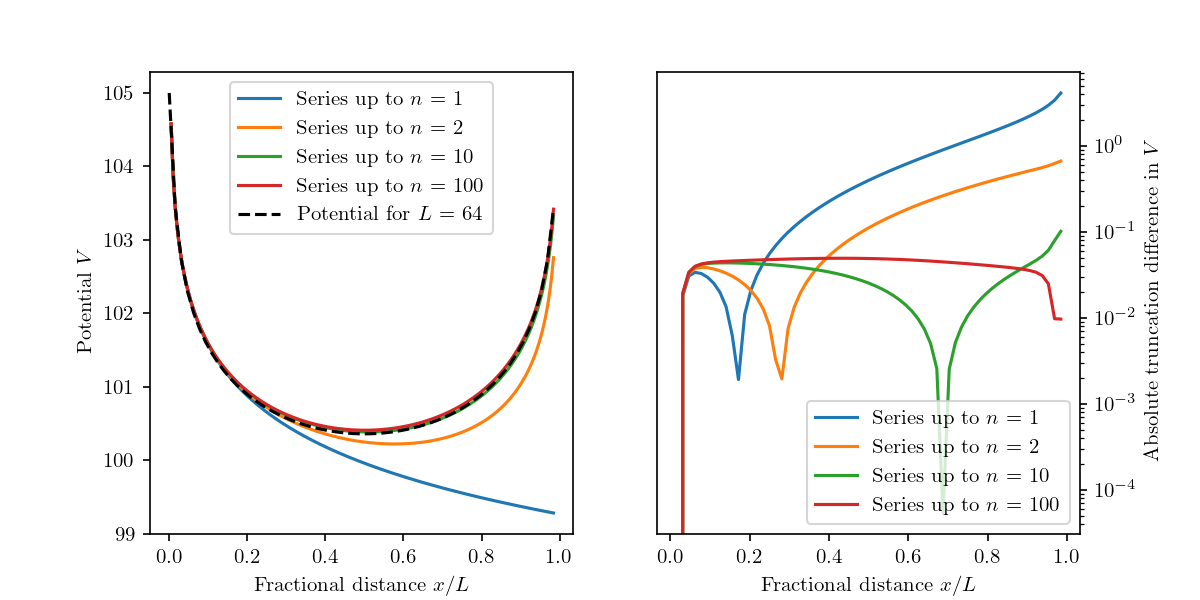

C:\Users\jonat\AppData\Local\Temp/ipykernel_14500/1006621354.py:14: RuntimeWarning: divide by zero encountered in log
  pot = V[1,0]-np.log(x)
C:\Users\jonat\AppData\Local\Temp/ipykernel_14500/1006621354.py:14: RuntimeWarning: divide by zero encountered in log
  pot = V[1,0]-np.log(x)
C:\Users\jonat\AppData\Local\Temp/ipykernel_14500/1006621354.py:14: RuntimeWarning: divide by zero encountered in log
  pot = V[1,0]-np.log(x)
C:\Users\jonat\AppData\Local\Temp/ipykernel_14500/1006621354.py:14: RuntimeWarning: divide by zero encountered in log
  pot = V[1,0]-np.log(x)
C:\Users\jonat\AppData\Local\Temp/ipykernel_14500/1006621354.py:14: RuntimeWarning: divide by zero encountered in log
  pot = V[1,0]-np.log(x)
C:\Users\jonat\AppData\Local\Temp/ipykernel_14500/1006621354.py:14: RuntimeWarning: divide by zero encountered in log
  pot = V[1,0]-np.log(x)
C:\Users\jonat\AppData\Local\Temp/ipykernel_14500/1006621354.py:14: RuntimeWarning: divide by zero encountered in log
  pot = V[1,0]-np.log(x)

In [7]:
# Figure 6
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

L_list = [8,16,32,64]
L = 64
lambd = 4*L
fac = 1
V = calc_V(L,L,lambd,fac,fac)
x_vec = np.linspace(0,L-1,L)

def potseries(x,N):
    pot = V[1,0]-np.log(x)
    for n in range(1,N):
        pot += -np.log(np.abs(n*L*fac-x)) +np.log(np.abs(n*L*fac-1))
        pot += -np.log(np.abs(n*L*fac+x)) +np.log(np.abs(n*L*fac+1))
    return pot

xmany_vec = np.linspace(0,L-1,200,'k')
xL_vec = np.linspace(0,L-1,L,'k')
for n in [1,2,10,100]:
    pot = potseries(xmany_vec,n)
    ax1.plot(xmany_vec/L,pot,label=f'Series up to $n$ = {n}')
    pot = potseries(xL_vec,n)
    ax2.semilogy(xL_vec/L,np.abs(V[:L,0]-pot),label=f'Series up to $n$ = {n}')
ax1.plot(x_vec/L,V[:L,0],'--k',label=f'Potential for $L$ = {L}')
ax1.set_xlabel(r'Fractional distance $x/L$')
ax1.set_ylabel(r'Potential $V$')
ax1.legend()
ax2.set_xlabel(r'Fractional distance $x/L$')
ax2.set_ylabel(r'Absolute truncation difference in $V$')
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
ax2.legend()
plt.savefig('Vseries.pdf',bbox_inches='tight')

In [8]:
(V[0,0]-V[1,0])*2

3.1407916077350535

### Figure 7

<IPython.core.display.Javascript object>


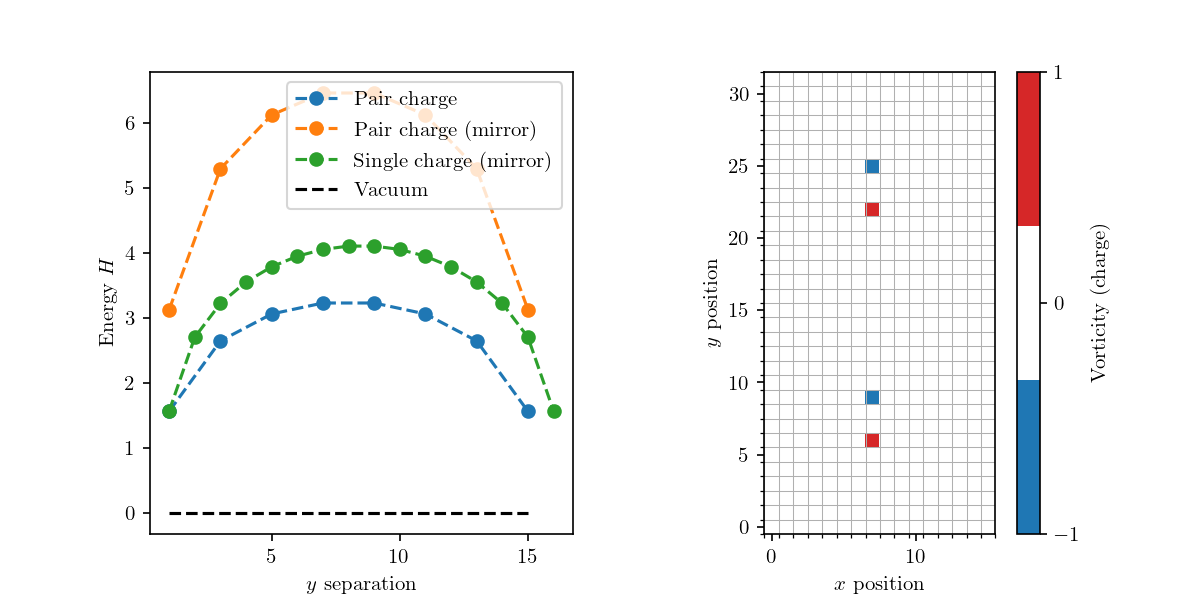

In [9]:
# Figure 7
current = 0
L = 16
Lx,Ly = L,2*L
lambd = 4*L
lattice = np.zeros((L,2*L))
V1 = calc_V(L,2*L,lambd)
V2 = calc_V(L,L,lambd)

L_list = 2*np.arange(Ly//4)+1
H_list_1 = np.zeros(Ly//4)
H_list_2 = np.zeros(Ly//4)
vac_list = np.zeros(Ly//4)
for i in range(Ly//4):
    lattice[7,Ly//4-i-1] = 1
    lattice[7,Ly//4+i] = -1
    lattice[7,3*Ly//4-i-1] = 1
    lattice[7,3*Ly//4+i] = -1
    H_list_1[i] = calc_H(lattice,V1)
    lattice = np.zeros((Lx,Ly//2))
    lattice[7,Ly//4-i-1] = 1
    lattice[7,Ly//4+i] = -1
    H_list_2[i] = calc_H(lattice,V2)
    lattice = np.zeros((L,2*L))
    
L_list_3 = np.arange(L)+1
H_list_3 = np.zeros(L)
lattice = np.zeros((L,2*L))
for i in range(L):
    # Single charge insertion
    q = 1
    lattice[7,i] = q
    lattice[7,2*L-i-1] = -q
    H_list_3[i] = calc_H(lattice,V1)
    lattice = np.zeros((L,2*L))

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(L_list,H_list_2,'o--',label='Pair charge')
ax1.plot(L_list,H_list_1,'o--',label='Pair charge (mirror)')
ax1.plot(L_list_3,H_list_3,'o--',label='Single charge (mirror)')
ax1.plot(L_list,vac_list,'k--',label='Vacuum')
ax1.set_xlabel('$y$ separation')
ax1.set_ylabel('Energy $H$')
ax1.legend()

L = 16
Lx,Ly = L,2*L
lambd = 4*L
lattice = np.zeros((L,2*L))
i = 1
lattice[7,Ly//4-i-1] = 1
lattice[7,Ly//4+i] = -1
lattice[7,3*Ly//4-i-1] = 1
lattice[7,3*Ly//4+i] = -1

from matplotlib import animation
from matplotlib import colors

# make a color map of fixed colors
cmap = colors.ListedColormap(['tab:blue','white', 'tab:red'])
bounds=[-1,-0.5,0.5,1]
norm = colors.BoundaryNorm(bounds, cmap.N)

im = ax2.imshow(lattice.T, interpolation='nearest', origin='lower',
                    cmap=cmap, norm=norm)

# Minor ticks
ax2.set_xticks(np.arange(-.5, L, 1), minor=True)
ax2.set_yticks(np.arange(-.5, 2*L, 1), minor=True)
ax2.grid(which='minor', linestyle='-', linewidth=0.5)

ax2.set_xlabel(r'$x$ position')
ax2.set_ylabel(r'$y$ position')

fig.colorbar(im,ax=ax2,label='Vorticity (charge)', cmap=cmap, norm=norm, boundaries=bounds, ticks=[-1, 0, 1])
plt.savefig('energylandscape_separation_new.pdf',bbox_inches='tight')


plt.show()

### Figure 8

<IPython.core.display.Javascript object>


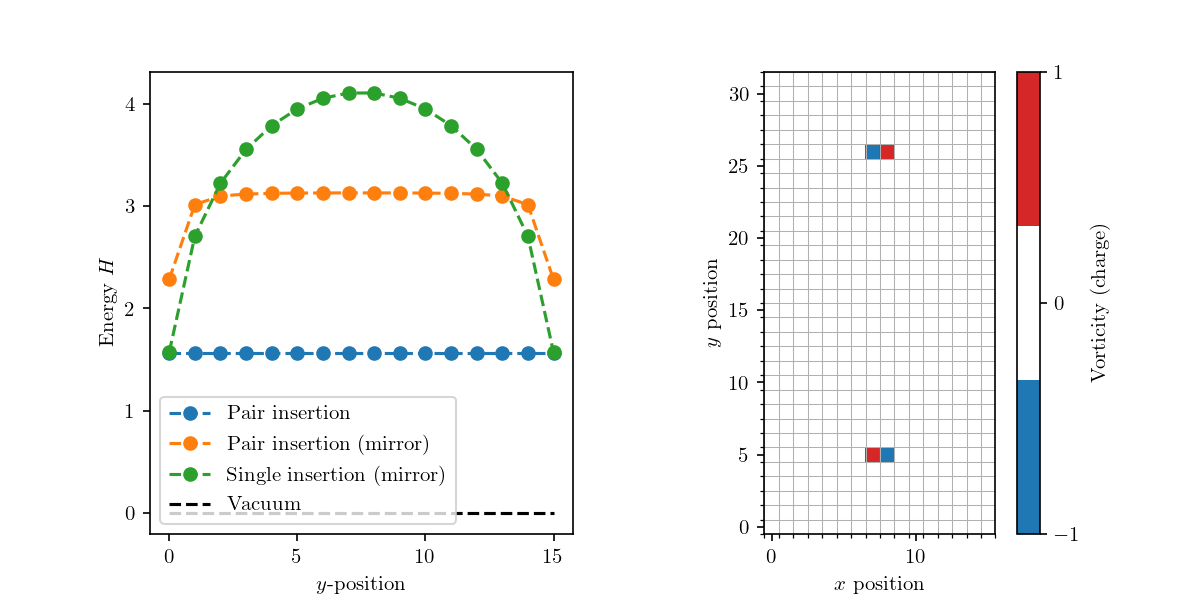

In [10]:
# Figure 8

L = 16
Lx,Ly = L,2*L
lambd = 4*L
lattice = np.zeros((Lx,Ly))
V = calc_V(L,2*L,lambd)

L_list = np.arange(Ly//2)
H_single_list = np.zeros(Ly//2)
H_pair_mirror_list = np.zeros(Ly//2)
H_pair_list = np.zeros(Ly//2)
vac_list = np.zeros(Ly//2)
for i in range(Ly//2):
    # Single charge insertion
    q = 1
    lattice[7,i] = q
    lattice[7,Ly-i-1] = -q
    H_single_list[i] = calc_H(lattice,V)
    lattice = np.zeros((Lx,Ly))
    # Pair mirror charge insertion
    lattice[7,i] = q
    lattice[8,i] = -q
    lattice[7,Ly-i-1] = -q
    lattice[8,Ly-i-1] = q
    H_pair_mirror_list[i] = calc_H(lattice,V)
    lattice = np.zeros((Lx,Ly//2))
    # Pair mirror charge insertion
    lattice[7,i] = q
    lattice[8,i] = -q
    H_pair_list[i] = calc_H(lattice,V)
    lattice = np.zeros((Lx,Ly))

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(L_list,H_pair_list,'o--',label='Pair insertion')
ax1.plot(L_list,H_pair_mirror_list,'o--',label='Pair insertion (mirror)')
ax1.plot(L_list,H_single_list,'o--',label='Single insertion (mirror)')
ax1.plot(L_list,vac_list,'k--',label='Vacuum')
ax1.set_xlabel('$y$-position')
ax1.set_ylabel('Energy $H$')
ax1.legend()


L = 16
Lx,Ly = L,2*L
lambd = 4*L
lattice = np.zeros((Lx,Ly))
V = calc_V(L,2*L,lambd)
i = 5
lattice[7,i] = q
lattice[8,i] = -q
lattice[7,Ly-i-1] = -q
lattice[8,Ly-i-1] = q

from matplotlib import animation
from matplotlib import colors

# make a color map of fixed colors
cmap = colors.ListedColormap(['tab:blue','white', 'tab:red'])
bounds=[-1,-0.5,0.5,1]
norm = colors.BoundaryNorm(bounds, cmap.N)

im = ax2.imshow(lattice.T, interpolation='nearest', origin='lower',
                    cmap=cmap, norm=norm)

# Minor ticks
ax2.set_xticks(np.arange(-.5, L, 1), minor=True)
ax2.set_yticks(np.arange(-.5, 2*L, 1), minor=True)
ax2.grid(which='minor', linestyle='-', linewidth=0.5)

ax2.set_xlabel(r'$x$ position')
ax2.set_ylabel(r'$y$ position')

fig.colorbar(im,ax=ax2,label='Vorticity (charge)', cmap=cmap, norm=norm, boundaries=bounds, ticks=[-1, 0, 1])
plt.savefig('energylandscape.pdf',bbox_inches='tight')
plt.show()

### Figure 9

<IPython.core.display.Javascript object>


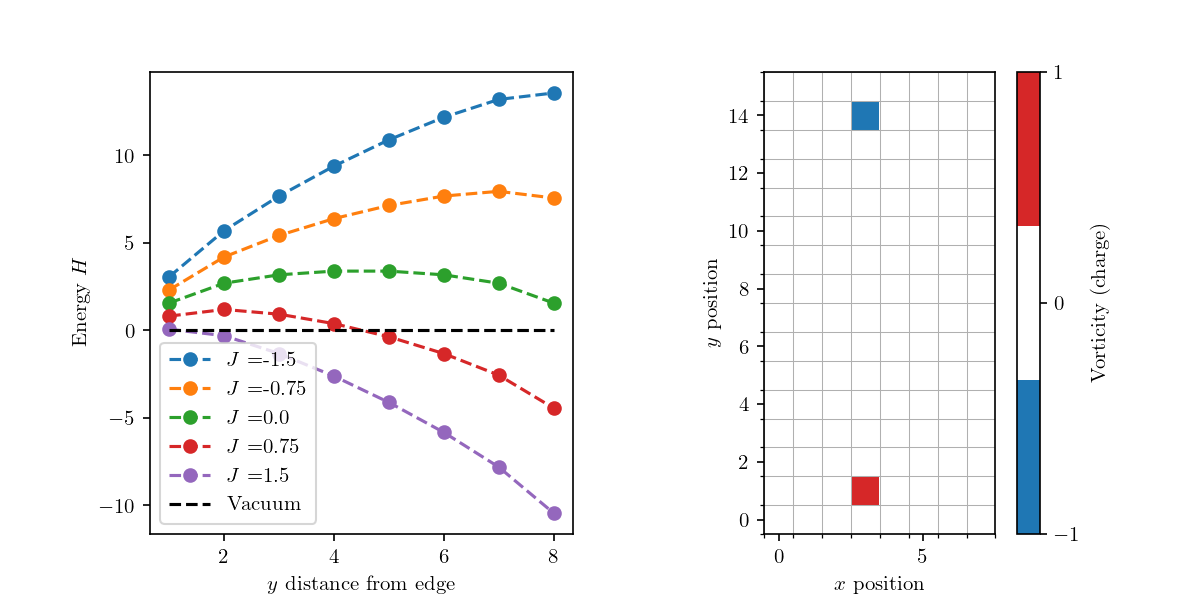

In [11]:
# Figure 9
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

curr_list = np.linspace(-1.5,1.5,5)
for current in curr_list:
    L = 8
    Lx,Ly = L,2*L
    lambd = 4*L
    lattice = np.zeros((L,2*L))
    V = calc_V(L,2*L,lambd)

    L_list = np.arange(Ly//2)
    dH_list = np.zeros(Ly//2)
    vac_list = np.zeros(Ly//2)

    dq = -1
    q1 = 0
    x1,y1 = 3, 0
    x2,y2 = 3, -1
    dy = y2-y1
    dH_list[0] = calc_dH_single_mirror(dq,q1,x1,y1,lattice,V)-current*(y2-y1)*dq
    lattice[x1,y1] += dq
    lattice[x1,Ly-y1-1] += -dq
    for i in range(1,Ly//2):
        # Single charge insertion
        y1 += 1
        y2 += 1
        q1 = lattice[x1,y1]
        q2 = lattice[x2,y2]
        dH_list[i] = calc_dH_pair_mirror(dq,q1,q2,x1,y1,x2,y2,lattice,V) -current*(y2-y1)*dq
        lattice[x1,y1] += dq
        lattice[x2,y2] += -dq
        lattice[x1,Ly-y1-1] += -dq
        lattice[x2,Ly-y2-1] += dq
    ax1.plot(1+L_list,np.cumsum(dH_list),'o--',label=f'$J$ ={np.round(current,2)}')
    
ax1.plot(1+L_list,vac_list,'k--',label='Vacuum')
ax1.set_xlabel('$y$ distance from edge')
ax1.set_ylabel('Energy $H$')
ax1.legend()

lattice = np.zeros((L,2*L))
lattice[x1,y1] += dq
lattice[x1,Ly-y1-1] += -dq
for i in range(1,Ly//2):
    # Single charge insertion
    y1 += 1
    y2 += 1
    q1 = lattice[x1,y1]
    q2 = lattice[x2,y2]
    lattice[x1,y1] += dq
    lattice[x2,y2] += -dq
    lattice[x1,Ly-y1-1] += -dq
    lattice[x2,Ly-y2-1] += dq
from matplotlib import animation
from matplotlib import colors

# make a color map of fixed colors
cmap = colors.ListedColormap(['tab:blue','white', 'tab:red'])
bounds=[-1,-0.5,0.5,1]
norm = colors.BoundaryNorm(bounds, cmap.N)

im = ax2.imshow(lattice.T, interpolation='nearest', origin='lower',
                    cmap=cmap, norm=norm)

# Minor ticks
ax2.set_xticks(np.arange(-.5, L, 1), minor=True)
ax2.set_yticks(np.arange(-.5, 2*L, 1), minor=True)
ax2.grid(which='minor', linestyle='-', linewidth=0.5)

ax2.set_xlabel(r'$x$ position')
ax2.set_ylabel(r'$y$ position')

fig.colorbar(im,ax=ax2,label='Vorticity (charge)', cmap=cmap, norm=norm, boundaries=bounds, ticks=[-1, 0, 1])
plt.savefig('critcurr.pdf',bbox_inches='tight')

plt.show()
